In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import math
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
from numpy import linspace, meshgrid
from Data import Data
from datetime import datetime, timedelta
import pymannkendall as mk
import PCA_functions as p

In [2]:
data = np.load('data.npy')
lat = np.load('lat.npy')
lon = np.load('lon.npy')

In [11]:
MK = np.zeros((len(lon), len(lat)))

In [12]:
for i in range(len(lon)):
    for j in range(len(lat)):
        x = data[26,11,:]
        MK[i,j] = mk.original_test(x)[1]

In [9]:
mk.original_test(x)[1]

False

In [22]:
np.count_nonzero(MK)

0

In [15]:
k = np.zeros((2, 2))

In [17]:
mk.original_test(x)[1]

False

In [20]:
k[0,0] = mk.original_test(x)[1]

In [21]:
k[0,0]

0.0

In [18]:
def fuzzify(x):
  # Add some "measurement error"" to each data point
    zero_idx = x==0
    x[zero_idx]+=0.005*np.random.uniform(0,1,1)[0]
    x[~zero_idx]+=0.005*np.random.uniform(-1,1,1)[0]
    return(x)

In [19]:
def transform(data):
    n  = data.shape[1]
    N  = data.shape[0]
    data_transformed = np.zeros(data.shape)
    for i in range(n):
        x = fuzzify(pd.DataFrame(result[:,i]))[0].values
        data_transformed[:,i], lambda_ = stats.boxcox(x)
    return(data_transformed)

In [3]:
result = []
index = []
lat_list = []
lon_list =[]

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if not data[i,j,-1]<0:
        #if not np.isnan(data[i,j,-1]):
            result.append(data[i,j,:])
            index.append((i,j))
            lon_list.append(lon[i])
            lat_list.append(lat[j])

result = np.matrix(result)
result = result.transpose()
data = pd.DataFrame(result)

In [122]:
temporal_limits = {"time_min":datetime(1948, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
d = Data('GPCC_africa_2.5.nc','precip',temporal_limits, missing_value=-9.969209968386869e+36)

result = d.get_data()
lon_list = d.get_lon_list()
lat_list = d.get_lat_list()
lon = d.get_lon()
lat = d.get_lat()

In [123]:
#result = transform(result)
data = pd.DataFrame(result)

In [10]:
[st.alpha, st.anglit, st.arcsine, st.argus, st.beta, st.betaprime,st.bradford,burr,st.burr12,st.cauchy,st.chi,st.chi2,
st.cosine,st.crystalball,st.dgamma,st.dweibull, st.erlang, st.expon, st.exponnorm, st.exponweib, st.exponpow, st.f,
st.fatiguelife, st.fisk , st.foldcauchy, st.foldnorm, st.frechet_r, st.frechet_l, st.genlogistic, st.gennorm, 
st.genpareto, st.genexpon, st.genextreme, st.gausshyper, st.gamma, st.gengamma, st.genhalflogistic, st.geninvgauss,
st.gilbrat, st.gompertz, st.gumbel_r, st.gumbel_l, st.halfcauchy, st.halflogistic, st.halfnorm, st.halfgennorm, 
st.hypsecant, st.invgamma, st.invgauss, st.invweibull, st.johnsonsb, st.johnsonsu, st.kappa4, st.kappa3, st.ksone,
st.kstwobign, st.laplace, st.levy, st.levy_l, st.levy_stable, st.logistic, st.loggamma,st.loglaplace, st.lognorm, 
st.loguniform, st.lomax, st.maxwell, st.mielke, st.moyal, st.nakagami, st.ncx2, st.ncf, st.nct, st.norm, st.norminvgauss,
st.pareto, st.pearson3, st.powerlaw, st.powerlognorm, st.powernorm, st.rdist, st.rayleigh, st.rice, st.recipinvgauss,
st.semicircular, st.skewnorm, st.t, st.trapz, st.triang, st.truncexpon, st.truncnorm, st.tukeylambda, st.uniform, 
st.vonmises, st.vonmises_line, st.wald, st.weibull_min, st.weibull_max, st.wrapcauchy]

NameError: name 'burr' is not defined

In [ ]:
["alpha", "anglit", "arcsine", "argus", "beta", "betaprime", "bradford","burr","burr12","cauchy","chi","chi2",
"cosine","crystalball","dgamma,dweibull", "erlang", "expon", "exponnorm", "exponweib", "exponpow", "f", "fatiguelife", 
"fisk", "foldcauchy", "foldnorm", "frechet_r", "frechet_l", "genlogistic", "gennorm", "genpareto", "genexpon", 
"genextreme", "gausshyper", "gamma", "gengamma", "genhalflogistic", "geninvgauss", "gilbrat", "gompertz", "gumbel_r", 
"gumbel_l", "halfcauchy","halflogistic", "halfnorm", "halfgennorm", "hypsecant", "invgamma", "invgauss", "invweibull", 
"johnsonsb", "johnsonsu", "kappa4", "kappa3", "ksone", "kstwobign", "laplace", "levy", "levy_l", "levy_stable", 
"logistic", "loggamma", "loglaplace", "lognorm", "loguniform", "lomax", "maxwell", "mielke", "moyal", "nakagami", 
"ncx2", "ncf", "nct", "norm", "norminvgauss", "pareto", "pearson3", "powerlaw", "powerlognorm", "powernorm", "rdist",
"rayleigh", "rice", "recipinvgauss", "semicircular", "skewnorm", "t", "trapz", "triang", "truncexpon", "truncnorm",
"tukeylambda", "uniform", "vonmises", "vonmises_line","wald", "weibull_min", "weibull_max", "wrapcauchy"]
    

In [61]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        #st.beta,st.chi2,
        #st.expon,st.exponnorm,
        #st.genextreme,st.gamma,st.gengamma,
        #st.halfnorm,st.invgamma,st.invgauss,
        #st.norm,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,
        #st.uniform
        st.norm, st.gamma, st.pearson3, st.genextreme 
        #st.dweibull, st.invgauss, st.lognorm
        #, st.gumbel_l, st.gumbel_r
        #"norm", "gamma", "pearson3", "genextreme", 
        #"dweibull", "invgauss", "lognorm", "gumbel_l", "gumbel_r"
        
    ]
    DISTRIBUTIONS_NAMES = [        
        #st.beta,st.chi2,
        #st.expon,st.exponnorm,
        #st.genextreme,st.gamma,st.gengamma,
        #st.halfnorm,st.invgamma,st.invgauss,
        #st.norm,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,
        #st.uniform
        #st.norm, st.gamma, st.pearson3, st.genextreme, 
        #st.dweibull, st.invgauss, st.lognorm, st.gumbel_l, st.gumbel_r
        "norm", "gamma", "pearson3", "genextreme" 
        #"dweibull", "invgauss", "lognorm""
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution, dist_name in list(zip(DISTRIBUTIONS,DISTRIBUTIONS_NAMES)):

        # Try to fit the distribution
       # try:
        #    # Ignore warnings from data that can't be fit
         #   with warnings.catch_warnings():
          #      warnings.filterwarnings('ignore')

                # fit dist to data
        params = distribution.fit(data)
        #anderson = st.anderson(data, distribution)
        #kstest = st.kstest(data, distribution)
        stat, p = st.kstest(x,dist_name, args=params)
        

                # Separate parts of parameters
            
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
        pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                #try:
                 #   if ax:
        #pd.Series(pdf, x).plot(ax=ax,legend = True, label = distribution.name)
                  #  end
               # except Exception:
                #    pass

                # identify if this distribution is better
        if best_sse > sse > 0:
            best_distribution = distribution
            best_params = params
            best_sse = sse
            best_p = p
      #  except Exception:
     #       pass

    return (best_distribution.name, best_params, best_p)

In [76]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        #st.beta,st.chi2,
        #st.expon,st.exponnorm,
        #st.genextreme,st.gamma,st.gengamma,
        #st.halfnorm,st.invgamma,st.invgauss,
        #st.norm,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,
        #st.uniform
        st.norm, st.gamma, st.pearson3, st.genextreme, st.dweibull
        #, st.invgauss, st.lognorm, st.gumbel_l, st.gumbel_r
    ]
    
    DISTRIBUTIONS_NAMES = [        
        #st.beta,st.chi2,
        #st.expon,st.exponnorm,
        #st.genextreme,st.gamma,st.gengamma,
        #st.halfnorm,st.invgamma,st.invgauss,
        #st.norm,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,
        #st.uniform
        #st.norm, st.gamma, st.pearson3, st.genextreme, 
        #st.dweibull, st.invgauss, st.lognorm, st.gumbel_l, st.gumbel_r
        "norm", "gamma", "pearson3", "genextreme","dweibull" 
        #, "invgauss", "lognorm", "gumbel_l", "gumbel_r"
        
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    best_p = 0

    # Estimate distribution parameters from data
    for distribution, dist_name in list(zip(DISTRIBUTIONS,DISTRIBUTIONS_NAMES)):

        # Try to fit the distribution
       # try:
        #    # Ignore warnings from data that can't be fit
         #   with warnings.catch_warnings():
          #      warnings.filterwarnings('ignore')

                # fit dist to data
        params = distribution.fit(data)
        stat, p = stats.kstest(x,dist_name, args=params)

                # Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
        pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                #try:
                 #   if ax:
        #pd.Series(pdf, x).plot(ax=ax,legend = True, label = distribution.name)
                  #  end
               # except Exception:
                #    pass

                # identify if this distribution is better
        if p > best_p:
            best_distribution = distribution
            best_params = params
            best_sse = sse
            best_p = p

      #  except Exception:
     #       pass

    return (best_distribution.name, best_p)

In [105]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [st.alpha, st.anglit, st.arcsine, st.argus, st.beta, st.betaprime,st.bradford,st.burr,st.burr12,st.cauchy,st.chi,st.chi2,
    st.cosine,st.crystalball,st.dgamma,st.dweibull, st.erlang, st.expon, st.exponnorm, st.exponweib, st.exponpow, st.f,
    st.fatiguelife, st.fisk , st.foldcauchy, st.foldnorm, st.frechet_r, st.frechet_l, st.genlogistic, st.gennorm, 
    st.genpareto, st.genexpon, st.genextreme, st.gausshyper, st.gamma, st.gengamma, st.genhalflogistic,
    st.gilbrat, st.gompertz, st.gumbel_r, st.gumbel_l, st.halfcauchy, st.halflogistic, st.halfnorm, st.halfgennorm, 
    st.hypsecant, st.invgamma, st.invgauss, st.invweibull, st.johnsonsb, st.johnsonsu, st.kappa4, st.kappa3, st.ksone,
    st.kstwobign, st.laplace, st.levy, st.levy_l, st.levy_stable, st.logistic, st.loggamma,st.loglaplace, st.lognorm, 
    st.lomax, st.maxwell, st.mielke, st.moyal, st.nakagami, st.ncx2, st.ncf, st.nct, st.norm, st.norminvgauss,
    st.pareto, st.pearson3, st.powerlaw, st.powerlognorm, st.powernorm, st.rdist, st.rayleigh, st.rice, st.recipinvgauss,
    st.semicircular, st.skewnorm, st.t, st.trapz, st.triang, st.truncexpon, st.truncnorm, st.tukeylambda, st.uniform, 
    st.vonmises, st.vonmises_line, st.wald, st.weibull_min, st.weibull_max, st.wrapcauchy]
     
    DISTRIBUTIONS_NAMES = ["alpha", "anglit", "arcsine", "argus", "beta", "betaprime", "bradford","burr","burr12","cauchy","chi","chi2",
    "cosine","crystalball","dgamma,dweibull", "erlang", "expon", "exponnorm", "exponweib", "exponpow", "f", "fatiguelife", 
    "fisk", "foldcauchy", "foldnorm", "frechet_r", "frechet_l", "genlogistic", "gennorm", "genpareto", "genexpon", 
    "genextreme", "gausshyper", "gamma", "gengamma", "genhalflogistic", "gilbrat", "gompertz", "gumbel_r", 
    "gumbel_l", "halfcauchy","halflogistic", "halfnorm", "halfgennorm", "hypsecant", "invgamma", "invgauss", "invweibull", 
    "johnsonsb", "johnsonsu", "kappa4", "kappa3", "ksone", "kstwobign", "laplace", "levy", "levy_l", "levy_stable", 
    "logistic", "loggamma", "loglaplace", "lognorm", "lomax", "maxwell", "mielke", "moyal", "nakagami", 
    "ncx2", "ncf", "nct", "norm", "norminvgauss", "pareto", "pearson3", "powerlaw", "powerlognorm", "powernorm", "rdist",
    "rayleigh", "rice", "recipinvgauss", "semicircular", "skewnorm", "t", "trapz", "triang", "truncexpon", "truncnorm",
    "tukeylambda", "uniform", "vonmises", "vonmises_line","wald", "weibull_min", "weibull_max", "wrapcauchy"]
           


    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution, dist_name in list(zip(DISTRIBUTIONS,DISTRIBUTIONS_NAMES)):

        # Try to fit the distribution
       # try:
        #    # Ignore warnings from data that can't be fit
         #   with warnings.catch_warnings():
          #      warnings.filterwarnings('ignore')

                # fit dist to data
        params = distribution.fit(data)

                # Separate parts of parameters
        arg = params[:-2]
        loc = params[-2]
        scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
        pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
        sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                #try:
                 #   if ax:
        pd.Series(pdf, x).plot(ax=ax,legend = True, label = distribution.name)
                  #  end
               # except Exception:
                #    pass

                # identify if this distribution is better
        if best_sse > sse > 0:
            best_distribution = distribution
            best_params = params
            best_sse = sse
            stat, p = stats.kstest(x,dist_name, args=params)

      #  except Exception:
     #       pass

    return (best_distribution.name, best_params, stat, p)

In [74]:
d = data.iloc[:,100].values

In [75]:
best_fit_distribution(d)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2402: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


('gamma',
 (289.87537354430197, -114.51283966450941, 0.4386556566509),
 0.10200282751855544)

In [124]:
dist = []
p_list = []
for i in range(data.shape[1]):
    d = data.iloc[:,i].values
    dist.append(best_fit_distribution(d)[0])
    p_list.append(best_fit_distribution(d)[1])

/home/mathsys2/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2402: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


In [125]:
p_list=np.array(p_list)

In [ ]:
p_list

In [128]:
index = np.where(p_list>0.01)[0]

In [115]:
df_air = pd.DataFrame({"dist":dist,"p":p_list})

In [94]:
df.iloc[i,0].values

array(['dweibull', 'gamma', 'dweibull', 'gamma', 'dweibull', 'dweibull',
       'dweibull', 'norm', 'dweibull', 'dweibull', 'gamma', 'dweibull',
       'dweibull', 'dweibull', 'dweibull', 'dweibull', 'dweibull',
       'gamma', 'dweibull', 'gamma', 'gamma', 'dweibull', 'dweibull',
       'dweibull', 'dweibull', 'dweibull', 'dweibull', 'norm', 'norm',
       'dweibull', 'norm', 'gamma', 'norm', 'gamma', 'genextreme', 'norm',
       'gamma', 'gamma', 'dweibull', 'gamma', 'dweibull', 'dweibull',
       'gamma', 'norm', 'norm', 'dweibull', 'gamma', 'dweibull',
       'dweibull', 'dweibull', 'norm', 'norm', 'gamma', 'gamma', 'gamma',
       'gamma', 'gamma', 'gamma', 'dweibull', 'norm', 'dweibull', 'gamma',
       'gamma', 'norm', 'dweibull', 'norm', 'genextreme', 'norm', 'gamma',
       'norm', 'dweibull', 'gamma', 'dweibull', 'norm', 'dweibull',
       'genextreme', 'dweibull', 'gamma', 'norm', 'dweibull', 'gamma',
       'dweibull', 'dweibull', 'dweibull', 'dweibull', 'dweibull',
       

In [129]:
len(index)

0

In [121]:
len(index)

144

In [119]:
df_air = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":dist})
lon_temp = df_air["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_air["lons"] = lon_temp

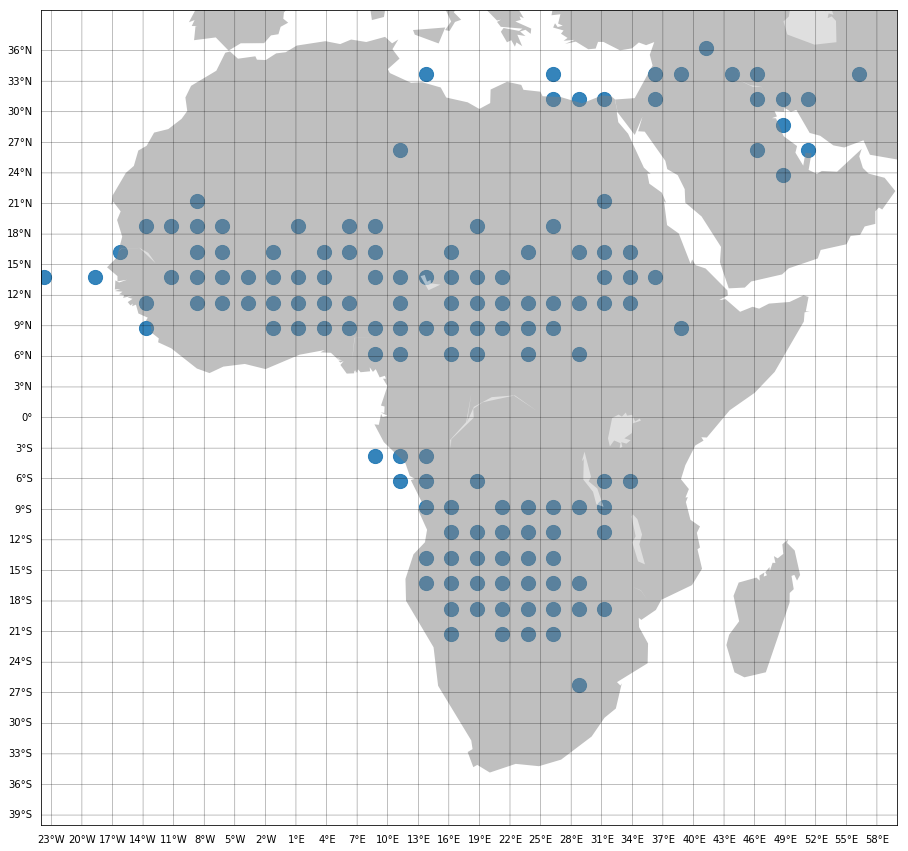

In [120]:
fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)


lons = df_air.iloc[index,0].values
lats = df_air.iloc[index,1].values
x,y = m(lons, lats)
ax.scatter(x, y, alpha=0.9, s=200, label = i)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


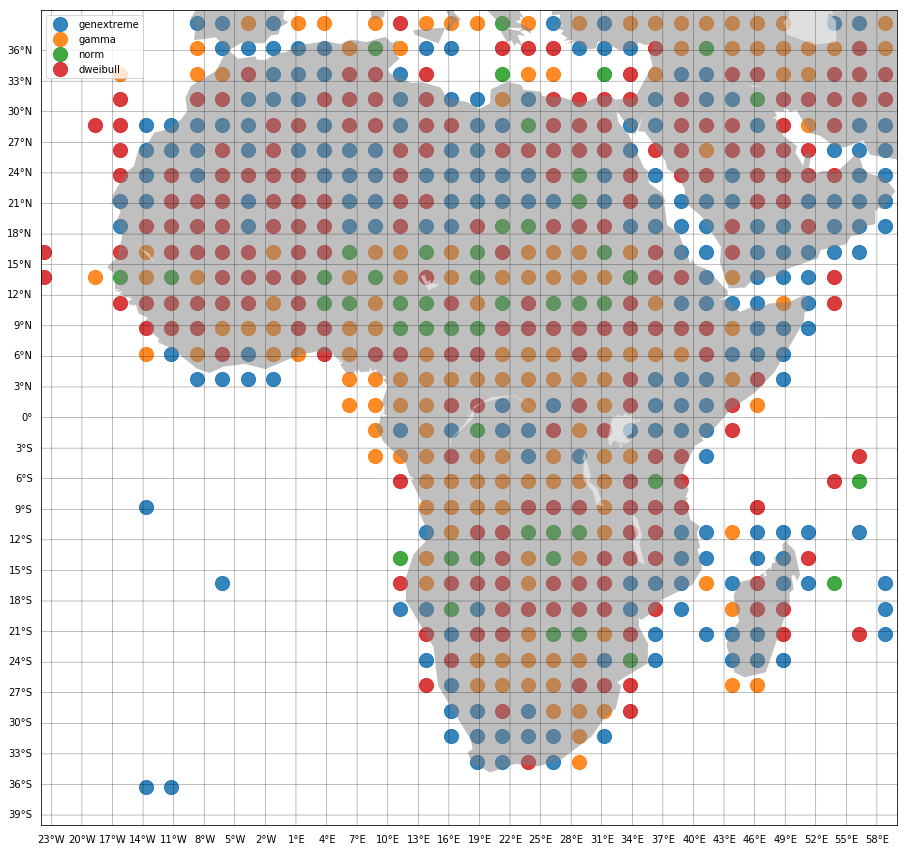

In [95]:
df_air = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":dist})

lon_temp = df_air["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_air["lons"] = lon_temp

df_list = []
for j in range(len(set(dist))):
    df_list.append(pd.DataFrame(columns=df_air.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)

i = 0
for j in set(dist):
    values = df_air["clusters"].values  
    Idx = np.where(values == j)[0]
    df_list[i] = df_air.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=200, label = i)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, set(dist))
    i+=1

    
#plt.legend()
plt.show()

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


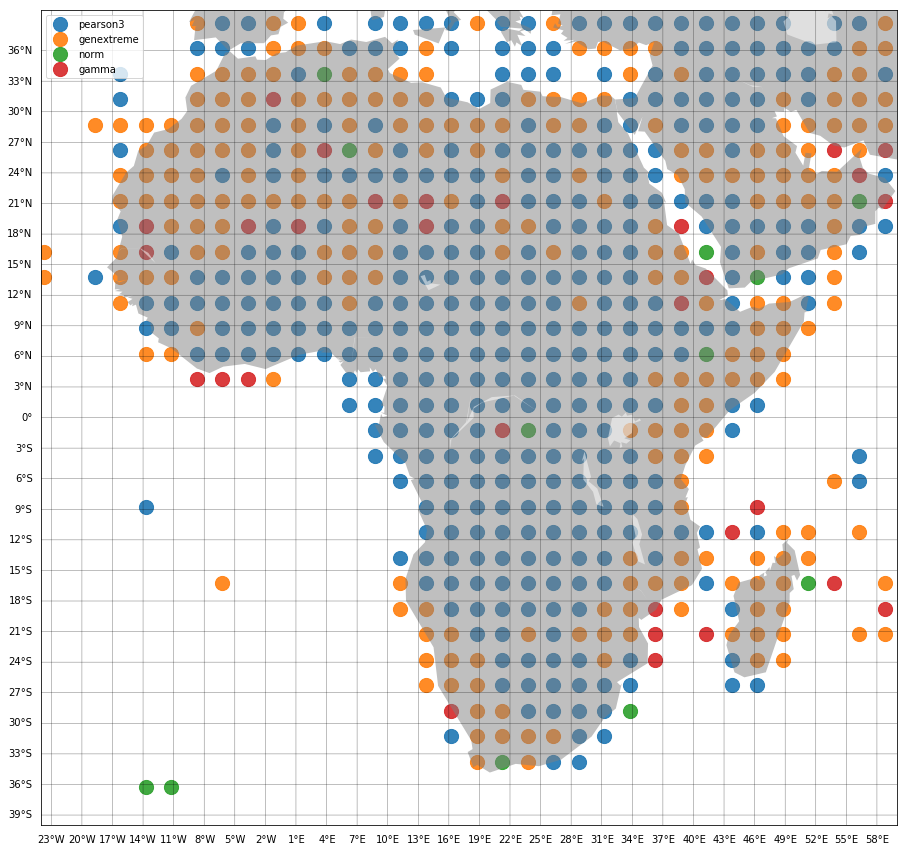

In [26]:
df_air = pd.DataFrame({"lons":lon_list,"lats":lat_list,"clusters":dist})

lon_temp = df_air["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_air["lons"] = lon_temp

df_list = []
for j in range(len(set(dist))):
    df_list.append(pd.DataFrame(columns=df_air.columns))

#lon = np.arange(-23.75,60.0,2.5)

fig, ax = plt.subplots(figsize=(30,15))
#fig = plt.figure(figsize=(30,15))
#ax = fig.add_subplot(111)
m = Basemap(llcrnrlon=-24, llcrnrlat=-40,urcrnrlon=60,urcrnrlat=40)
m.fillcontinents(color='grey', alpha=0.5)
m.drawparallels(np.arange(int(-39.75),int(39.75),3),labels=[1,0,0,0],linewidth=0.5)
m.drawmeridians(np.arange(int(-29.75),int(59.75),3),labels=[0,0,0,1],linewidth=0.5)
#m.drawcoastlines()
#colors = pf.random_color_1(n_components)

i = 0
for j in set(dist):
    values = df_air["clusters"].values  
    Idx = np.where(values == j)[0]
    df_list[i] = df_air.iloc[Idx,:]
    df_list[i]["values"] = values[Idx]

    lons = df_list[i]["lons"].values
    lats = df_list[i]["lats"].values
    x,y = m(lons, lats)
    ax.scatter(x, y, alpha=0.9, s=200, label = i)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, set(dist))
    i+=1

    
#plt.legend()
plt.show()

In [4]:
def studentT_test(first_var, second_var):
    n_1 = len(first_var)
    mean_1 = np.mean(first_var)
    var_1 = np.var(first_var)
    
    n_2 = len(second_var)
    mean_2 = np.mean(second_var)
    var_2 = np.var(second_var)
    
    d_f = min(n_1 - 1, n_2 - 1)
    
    t_test = (mean_1 - mean_2) /math.sqrt(var_1/n_1 + var_2/n_2) 
    p_value = 1 - stats.t.cdf(t_test, d_f)
    
    return(t_test, p_value, n_1, n_2)

In [13]:
d = data.iloc[:,0].values

In [47]:
idx = np.arange(0,841,12)
d = data[20,20,idx]

In [7]:
y, x = np.histogram(d, bins=200, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

In [40]:
d.mean()

244.86841

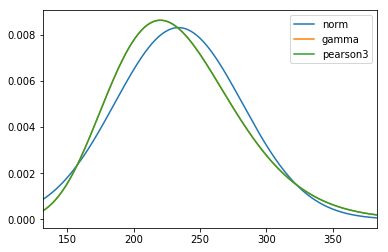

In [48]:
r = best_fit_distribution(d)

In [49]:
r[0]

'pearson3'

In [46]:
r[1]

3.909202696690655

In [17]:
d.mean()

2.1497145

/home/mathsys2/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


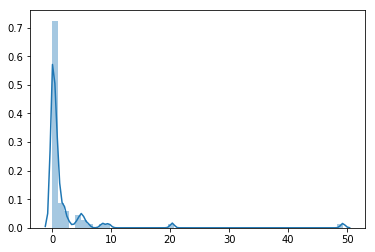

In [10]:
sns.distplot(d);

In [18]:
st.gamma.fit(d)

(0.14385605869304866, -6.4607504678491335e-28, 1.540857927488395)

In [22]:
p[0] * p[2]

4.156691087175467

In [21]:
d.mean()

2.1497145

In [151]:
params = st.norm.fit(d)

In [152]:
params

(14.531022, 32.08461)

In [89]:
normal = []
gamma = []
pearson = []
gen = []
for i in range(data.shape[1]):
    d = data.iloc[:,i].values
    
    y, x = np.histogram(d, bins=200, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    params = st.norm.fit(d)
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF and error with fit in distribution
    pdf = st.norm.pdf(x, loc=loc, scale=scale, *arg)
    sse = np.sum(np.power(y - pdf, 2.0))
    normal.append(sse)
    
    params = st.gamma.fit(d)
    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF and error with fit in distribution
    pdf = st.gamma.pdf(x, loc=loc, scale=scale, *arg)
    sse = np.sum(np.power(y - pdf, 2.0))
    gamma.append(sse)
    
    params = st.pearson3.fit(d)

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF and error with fit in distribution
    pdf = st.pearson3.pdf(x, loc=loc, scale=scale, *arg)
    sse = np.sum(np.power(y - pdf, 2.0))
    pearson.append(sse)

In [93]:
studentT_test(normal, gamma)

(0.2741284353178988, 0.39203760625649064, 635, 635)

In [75]:
diff = np.array(gamma) - np.array(normal)

In [127]:
len(diff)

635

In [97]:
diff = np.array(normal) - np.array(gamma)

In [136]:
deg = np.zeros((32,34))

In [137]:
deg[:,:] = np.nan

In [138]:
for i in range(635):
    lon_index = index[i][0]
    lat_index = index[i][1]
    deg[lat_index,lon_index] = diff[i]

Text(0.5,1,'Errors for Exponential Smoothing')

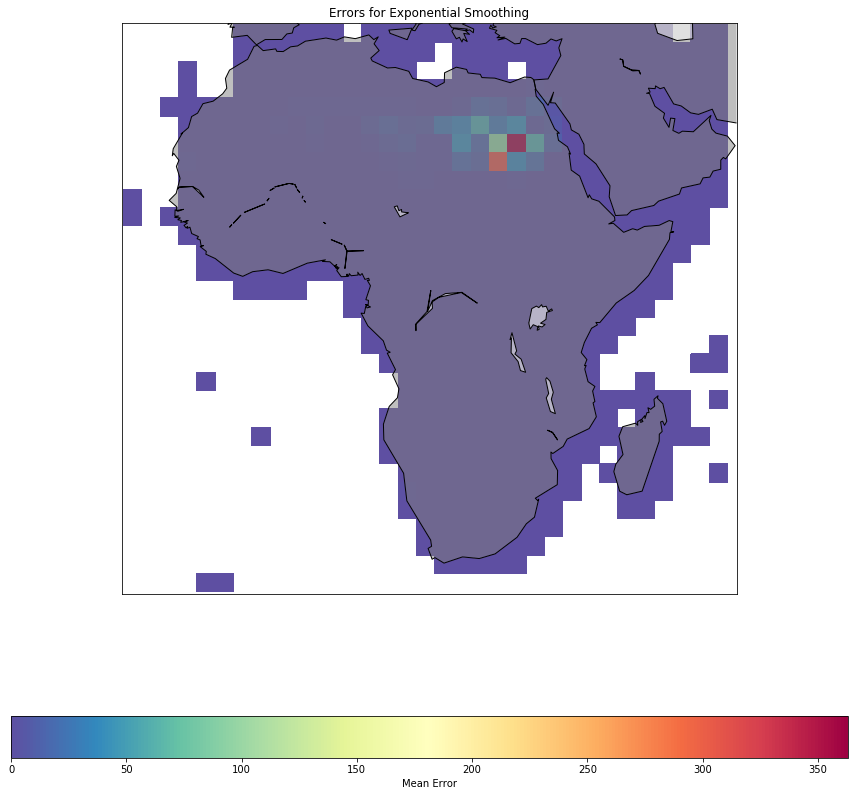

In [140]:
lon1 = np.arange(-23.75,60.0,2.5)
plt.figure(figsize=(30,15))
# Make the background map
m=Basemap(llcrnrlon=-24, llcrnrlat=-39,urcrnrlon=60,urcrnrlat=39)
#m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")
m.drawcoastlines()
xx, yy = meshgrid(lon1, lat)
cs = m.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
#cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
cbar.set_label('Mean Error')
plt.title("Errors for Exponential Smoothing")